In [174]:
#This is implementation of logistic regression with regularization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Import Libraries to do thing the blackbox way 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [175]:
#Load the data, this dataset is for spam classification from UCI ML repository
df=pd.read_csv('spambase.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [176]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [177]:
df.shape

(4601, 58)

Last row is target variable, separate it out.

In [178]:
# Convert X,y to numpy arrays
x = df.iloc[:,0:57]
d = df.iloc[:,57]
N=x.shape[1]
#y is in the form of a series, make it an array
y=np.asmatrix(d)
#Need to take transpose
y=y.T

(array([2788.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1813.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

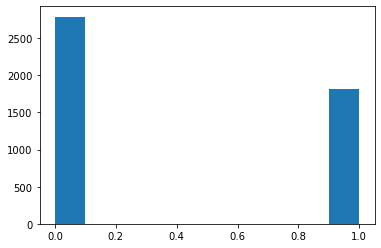

In [179]:
plt.hist(y)

In [180]:
#Split Training Set and Testing Set
x_train1, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5)

In [181]:
#Since the feature values are over a wide range do Feature Scaling
sc_X=StandardScaler()
x_train1=sc_X.fit_transform(x_train1)
x_test=sc_X.transform(x_test)

In [182]:
#Insert 1 s in the x s, this is the bias term in logistic regression
x_train=np.insert(x_train1,0,values=1,axis=1)
x_test=np.insert(x_test,0,values=1,axis=1)
N=x_train.shape[1]
beta=np.random.uniform(low=.001,high=.1,size=(N,1))

In [183]:
#Print the shapes and see if it makes sense
print(x_train.shape)
print(beta.shape)

(2300, 58)
(58, 1)


In [184]:
#Define the sigmoid function
def sigmoid(x,beta):
    #x is your feature and beta is the parameters
    return (1/(1+np.exp(-(x@beta))))

#Logistic Regression class. 
class grad_descent:
    #This takes, target_train, feature_train, beta,target_validation, feature_validation
    # regularization parameter, learning rate, iteration number
    def __init__(self,y_t,x_t,beta,y_v,x_v,lmda,learning_rate,max_iter):
        self.y_t=y_t
        self.x_t=x_t
        self.beta=beta
        self.y_v=y_v
        self.x_v=x_v
        self.lmda=lmda
        self.learning_rate=learning_rate
        self.max_iter=max_iter
    
    #The sigmoid function
    def sigmoid(self):
        return (1/(1+np.exp(-(self.x_t@self.beta)))) 
   
    #The gradient   
    def gradient(self):
        return (1/len(self.x_t))*(self.x_t.T@(sigmoid(self.x_t,self.beta)-self.y_t)+2*self.lmda*self.beta)    

    #Define Loglikelihood
    def loglikelihood(self,x,y):
    #Ridge regression, excluding the beta_0 term from regularization
        reg=self.lmda*self.beta[1:len(self.beta)].T@self.beta[1:len(self.beta)]
        return -(1/len(x))*(((x@self.beta).T@y-np.ones((1,len(x)))@(np.log(1+np.exp(x@self.beta))))+reg)
        #return -(1/len(x))*((x@self.beta).T@y+reg)        
    
   #Gradient descent 
    def g_d_cal(self):
    #Initialize for training cost
        cost_of_train=[]
    #Initialize for validation cost
        cost_of_valid=[]
        it_n=[]
        for i in range(self.max_iter):
    #Calculate the gradient
            dtheta=self.gradient()
    #Update theta
            self.beta=self.beta-self.learning_rate*dtheta
            #The loglikelihood or the cost function
    #for training data
            cost_train=self.loglikelihood(self.x_t,self.y_t)[0,0]
            cost_of_train.append(cost_train)
            #for validation data 
            cost_valid=self.loglikelihood(self.x_v,self.y_v)[0,0]
            cost_of_valid.append(cost_valid)
            it_n.append(i)
        return (self.beta,it_n,cost_of_train,cost_of_valid)

0.9343478260869565

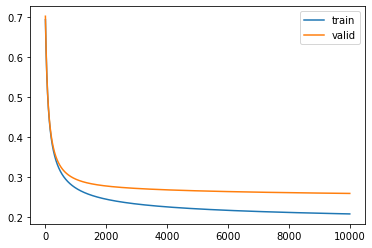

In [185]:
#Initialize beta same length as the number of features, including the bias term
N=x_train.shape[1]
beta=np.random.uniform(low=-.1,high=.1,size=(N,1))
#Do the fitting/minimization to get the values of beta
#gd=grad_descent(y_train,x_train,beta,y_test,x_test,0.3,1e-2,10000)
gd=grad_descent(y_train,x_train,beta,y_test,x_test,0.5,1e-2,10000)
#Return the results from gradient descent,this returns, opt_beta,i,cost for train, cost for validation
beta_opt=gd.g_d_cal()
plt.plot(beta_opt[1],beta_opt[2],label='train')
plt.legend()
#plt.legend('test')
plt.plot(beta_opt[1],beta_opt[3],label='valid')
#plt.legend('train','test')
plt.legend()

#beta_opt=grad_descent(y_train,x_train,beta,y_test,x_test,0.5,1e-2,1000)
from sklearn.metrics import accuracy_score
#See how good this is doing
y_pred = np.around(sigmoid(x_train,beta_opt[0]))
y_true = y_train
accuracy_score(y_true, y_pred)

In [186]:
#Randomize the indexes of the dataframe for the k fold validation
#This function takes data, number of k fold, regularization parameter,learning rate, 
#maximum iteration for grad. desc.
def cross_validation(data,k_of_fold,lmda,learning_rate,max_iter):
    import random
#Create an array of indexes
    a=np.arange(len(data))
#Randomly shuffle the array, this will be used to get the train,validation parts
    random.shuffle(a)
#How many folds 
    k_of_fold=5
#NUmber of data points in each fold
    point_in_fold=int(len(data)/k_of_fold)
    ac_sc_v=[]
    ac_sc_t=[]
    #for each fold test on one part train on the other part
    for i in np.arange(k_of_fold):  
        #Choose part that will be validation part.
        valid=data.iloc[a[int(i*point_in_fold):int(i*point_in_fold+point_in_fold)]]
        x_valid= valid.iloc[:,0:57].values
    #insert the bias 1 term
        x_valid=np.insert(x_valid,0,values=1,axis=1)
        y_valid= valid.iloc[:,57]
        y_valid=np.asmatrix(y_valid)
        y_valid=y_valid.T
    ##################
        #Delete the validdation part and keep the rest to train
        train=data.drop(a[int(i*point_in_fold):int(i*point_in_fold+point_in_fold)])
        x_train=train.iloc[:,0:57].values
    #insert the bias 1 term
        x_train=np.insert(x_train,0,values=1,axis=1)
        y_train=train.iloc[:,57]
        y_train=np.asmatrix(y_train)
        y_train=y_train.T
    #Do, feature scalling
        sc_X=StandardScaler()
        x_train=sc_X.fit_transform(x_train)
        x_valid=sc_X.transform(x_valid)
   #Initial guess beta
        N=x_train.shape[1]
        beta=np.random.uniform(low=.001,high=.1,size=(N,1))
    #Call gradient descent
        gd=grad_descent(y_train,x_train,beta,y_valid,x_valid,lmda,learning_rate,max_iter)
        beta_opt=gd.g_d_cal()
        #Predict on validation set
        y_pred_valid = np.around(sigmoid(x_valid,beta_opt[0]))
        a_sc_valid=accuracy_score(y_valid, y_pred_valid)
        ac_sc_v.append(a_sc_valid)
        #print('append',ac_sc_v)
        #Predict on training set
        y_pred_train = np.around(sigmoid(x_train,beta_opt[0]))
        ac_sc_train=accuracy_score(y_train, y_pred_train)
        ac_sc_t.append(ac_sc_train)
        #print('append train',ac_sc_t)
    #print('lambda=',lmda, 'Avg. accuracy score on training',sum((ac_sc_t))/k_of_fold)
    print('lambda=',lmda,'Avg. accuracy score on validation',sum(ac_sc_v)/k_of_fold)

In [187]:
#Initialize the regularization parameter
lmbda=[0.1,2,3,5,6,10,30]
#Now run the k fold cross validation
for i in lmbda:
    cross_validation(df,k_of_fold=5,lmda=i,learning_rate=1e-1,max_iter=10000)

lambda= 0.1 Avg. accuracy score on validation 0.9213043478260868
lambda= 2 Avg. accuracy score on validation 0.9199999999999999
lambda= 3 Avg. accuracy score on validation 0.917608695652174
lambda= 5 Avg. accuracy score on validation 0.9206521739130435
lambda= 6 Avg. accuracy score on validation 0.917608695652174
lambda= 10 Avg. accuracy score on validation 0.9197826086956521
lambda= 30 Avg. accuracy score on validation 0.9184782608695652


lambda=5 gives good score on validation. 

In [84]:
x_train1, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5)

In [85]:
#Now try the blackbox way
from sklearn import metrics

In [86]:
clf=LogisticRegression(solver='lbfgs',max_iter=10000)
clf.fit(x_train1,np.ravel(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
y_pred = clf.predict(x_test)
y_pred_prob = clf.predict_proba(x_test)
#Take only the positive exapmles
y_pred_prob = y_pred_prob[:, 1]

In [130]:
accuracy_score(y_pred,y_test)

0.9313342025206433

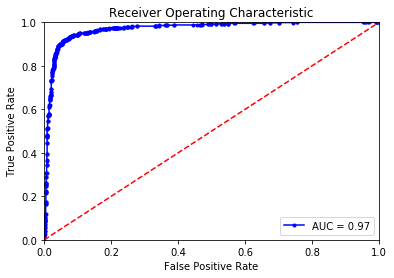

In [131]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, '.-b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()